In [1]:
import numpy as np
import pandas as pd
import scipy
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import MiniBatchKMeans
import warnings
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_csv("C:\\Users\\Goksun\\Downloads\\heart.csv")
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [3]:
X = df.iloc[:, :13]
y = df.iloc[:, 13]

In [4]:
X = X.replace(to_replace='?', value=0)
y = np.where(y > 0, 0, 1)

In [5]:
scaler=StandardScaler()
X_std=scaler.fit_transform(X)

K-Means were about choosing the number of clusters (k) and selecting random centroids for each cluster.

In [6]:
pca = PCA(n_components=2).fit_transform(X_std)
pca_df=pd.DataFrame(pca)

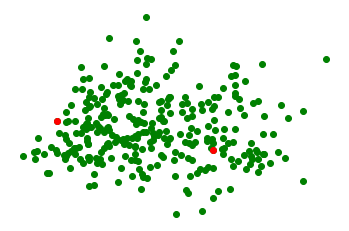

In [7]:
#Every time you run this code, you might get different centroids.
Centroids = (pca_df.sample(n=2))
plt.scatter(pca_df[0],pca_df[1],c='g')
plt.scatter(Centroids[0],Centroids[1],c='red')
plt.xlabel([])
plt.ylabel([])
plt.axis("off")
plt.show()

Now, let’s see how we can use the elbow curve to determine the optimum number of clusters in Python

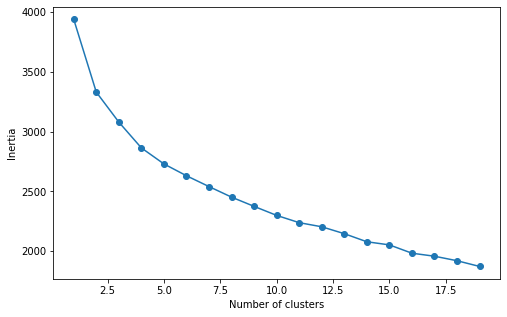

In [8]:
SSE = []
for cluster in range(1,20):
    kmeans = KMeans(n_jobs = -1, n_clusters = cluster, init='k-means++')
    kmeans.fit(X_std)
    SSE.append(kmeans.inertia_)

# converting the results into a dataframe and plotting them
frame = pd.DataFrame({'Cluster':range(1,20), 'SSE':SSE})
plt.figure(figsize=(8,5))
plt.plot(frame['Cluster'], frame['SSE'], marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.show()

K-Means were about choosing the number of clusters (k) and selecting random centroids for each cluster.

We can choose any number of clusters between 2 to 4.

In [10]:
Kmeans_cluster=KMeans(n_clusters=2,init='k-means++',random_state=123)

33 ms ± 1.21 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


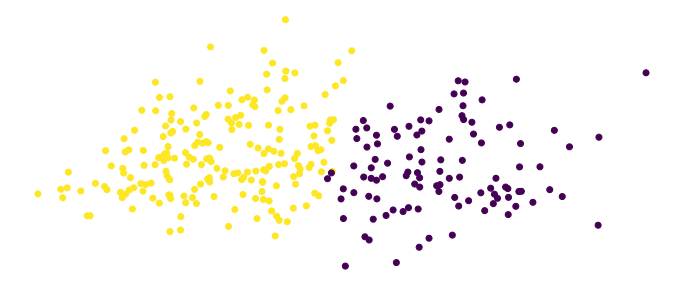

In [11]:
%timeit Kmeans_cluster.fit(X_std)
y_pred=Kmeans_cluster.predict(X_std)
plt.figure(figsize=(12,5))
plt.scatter(pca[:, 0], pca[:, 1], c=y_pred)
plt.xticks([])
plt.yticks([])
plt.axis('off')
plt.show()

In the drawing below, the numbers indicate the set assigned by the algorithm for each observation. Colors show real classes.

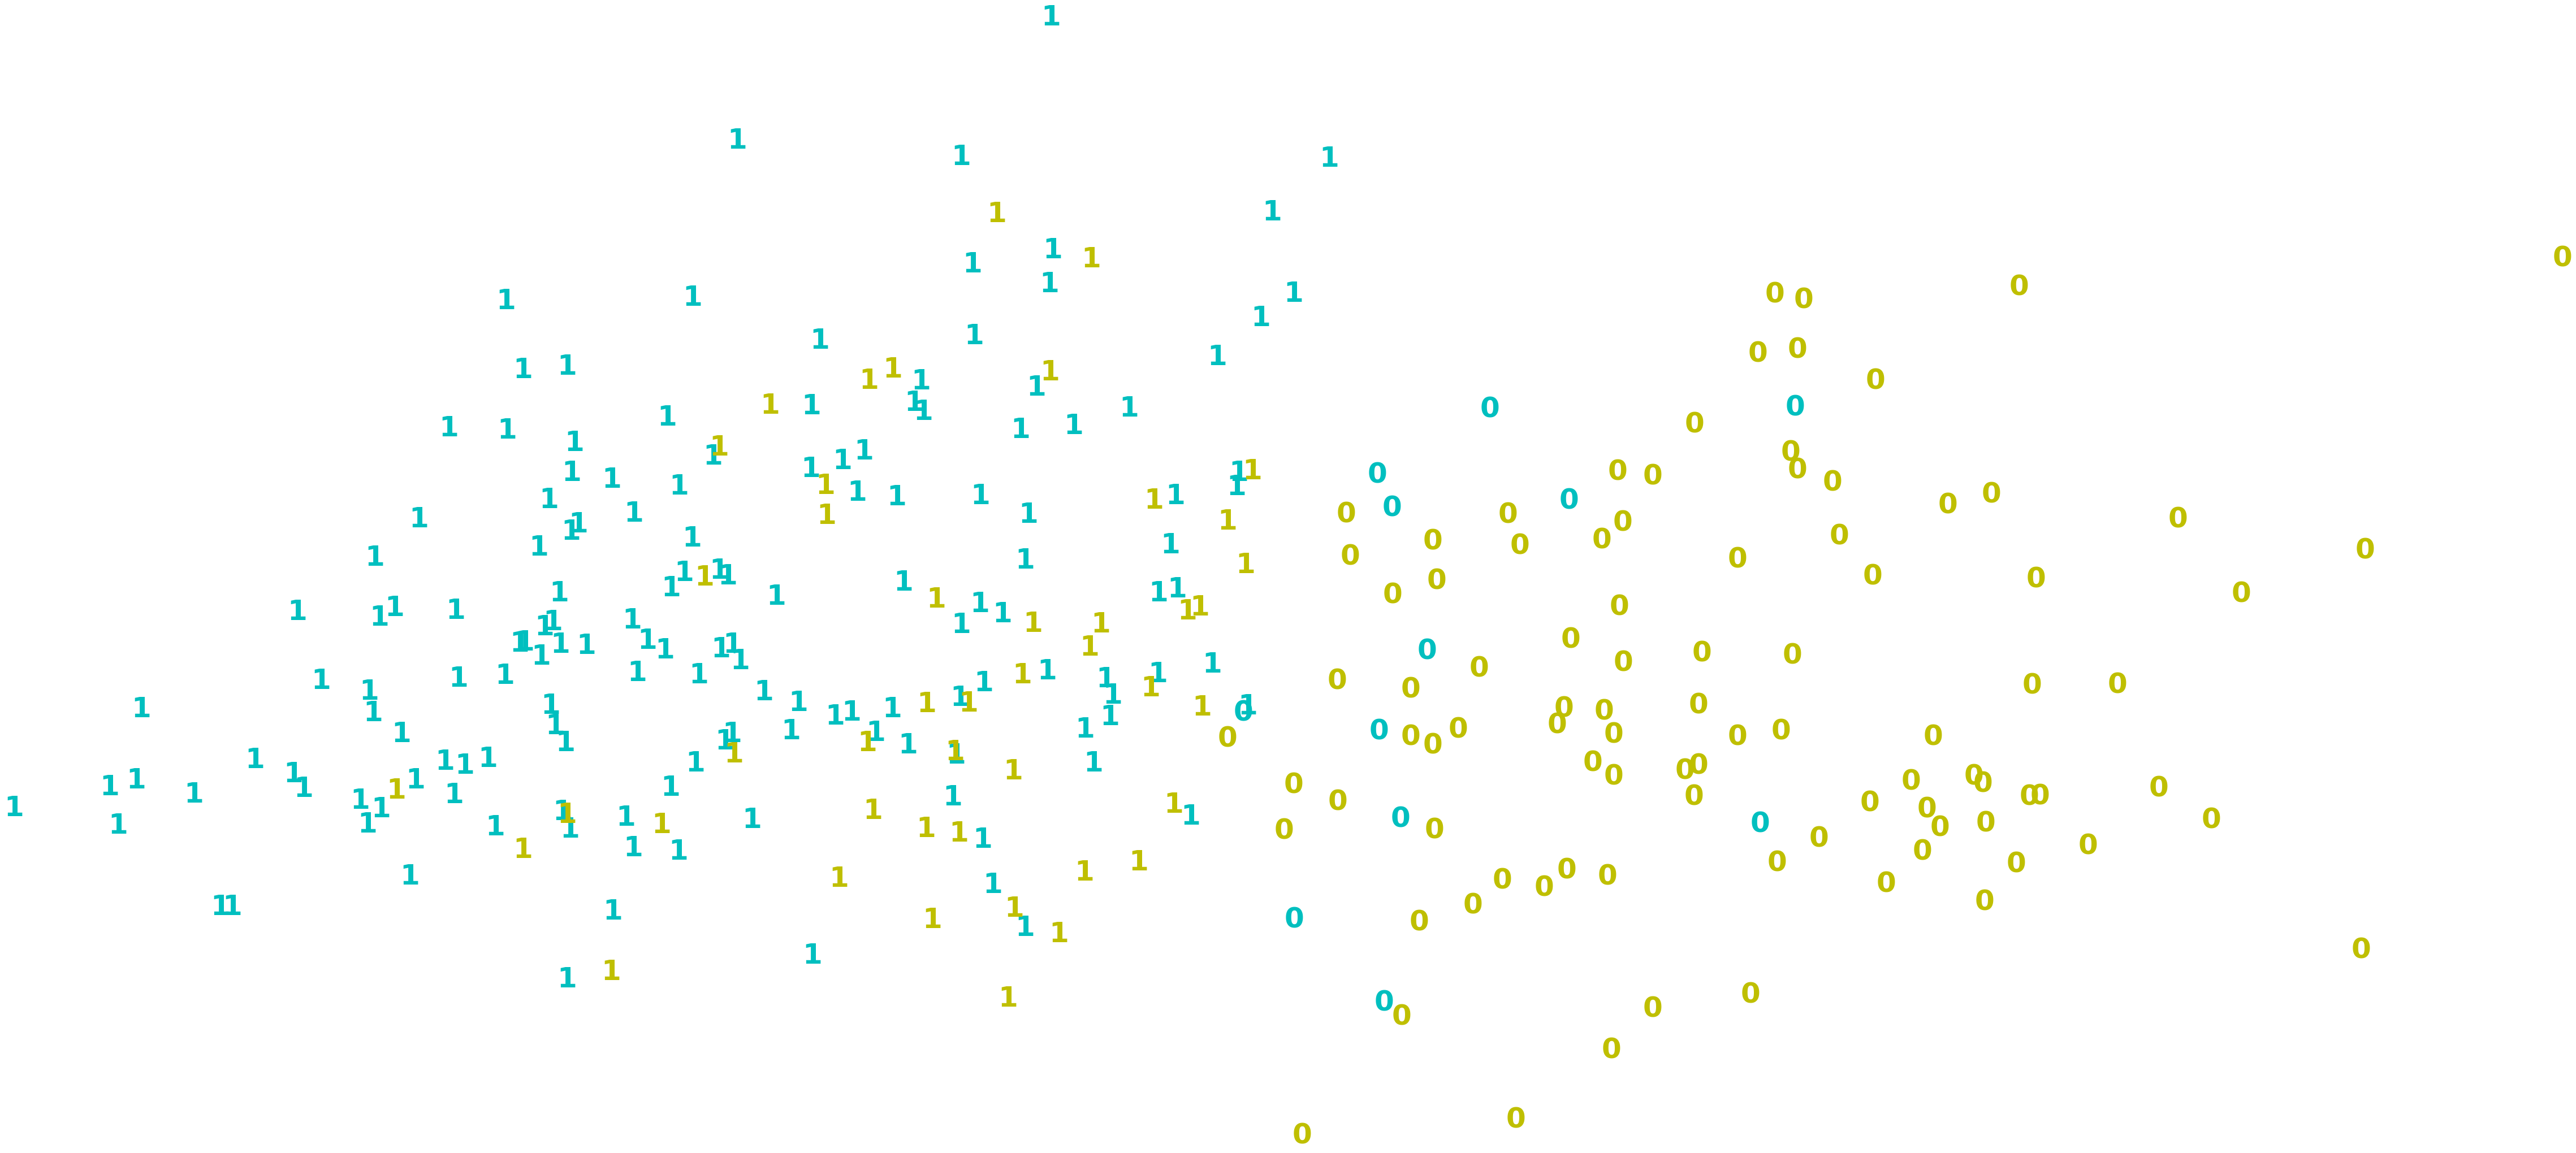

In [12]:
plt.figure(figsize=(10,5))
colours = 'cy'
for i in range(pca.shape[0]):
    plt.text(pca[i, 0], pca[i, 1], str(y_pred[i]),
             color=colours[y[i]],
             fontdict={'weight': 'bold', 'size': 50}
        )

plt.xticks([])
plt.yticks([])
plt.axis('off')
plt.show()

Not good! KMeans algorithm has clustered classes badly.Especially for class 0.